HOW TO OPTIMIZE A STOCK PORTFOLIO USING DIFFERENT METHODS AND SOLVERS

In [213]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [214]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 6]})

HOW TO OPTIMIZE A STOCK PORTFOLIO USING DIFFERENT METHODS AND SOLVERS

In [284]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import quantstats as qs
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\aaron\AppData\Local\Temp\ipykernel_18072\3817762481.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [217]:
assets = ['ADBE','AMZN','AAPL','AMD','NFLX','GOOG','META','MSFT','NVDA','TSLA' ]

In [218]:
start_date= '2019-06-29'
end_date= '2023-06-29'

In [219]:
n_assets=len(assets)

In [220]:
df=pd.DataFrame()

prices_df= yf.download(assets, start=start_date, end=end_date)

[*********************100%***********************]  10 of 10 completed


In [221]:
prices_df.head().dropna()

Adj Close                                                
                 AAPL        ADBE        AMD       AMZN       GOOG   
Date                                                                 
2019-06-12  47.101891  276.839996  32.180000  92.765999  53.851501  \
2019-06-13  47.092182  276.299988  31.389999  93.514999  54.438499   
2019-06-14  46.750183  274.279999  30.360001  93.483498  54.267502   
2019-06-17  47.029110  275.600006  29.200001  94.301498  54.625000   
2019-06-18  48.135166  276.779999  30.450001  95.068497  55.180000   

                                                                      ...   
                  META        MSFT        NFLX       NVDA       TSLA  ...   
Date                                                                  ...   
2019-06-12  175.039993  126.382423  345.559998  36.351101  13.950667  ...  \
2019-06-13  177.470001  127.180176  343.429993  36.863300  14.260667  ...   
2019-06-14  181.330002  127.305138  339.730011  35.963219  14.328000  ...   
2019-06-17  189.009995  127.689598  350.619995  36.060196  15.002000  ...   
2019-06-18  188.470001  129.909851  357.119995  38.012020  14.982667  ...   

               Volume                                                    
                 AAPL     ADBE       AMD      AMZN      GOOG      META   
Date                                                                     
2019-06-12   73012800  1313700  56298700  53566000  21220000  17699800  \
2019-06-13   86698400  1696400  63556000  55916000  21154000  12253600   
2019-06-14   75046000  2262800  70373000  57024000  22230000  16773700   
2019-06-17   58676400  2254200  70865700  52686000  18832000  29459900   
2019-06-18  106204000  4529300  86444500  77914000  27734000  37571400   

                                                    
                MSFT     NFLX      NVDA       TSLA  
Date                                                
2019-06-12  17092500  4584700  35889200  227962500  
2019-06-13  17200800  6209300  30808000  122524500  
2019-06-14  17821700  5019000  39442800  111501000  
2019-06-17  14517800  5358200  27604000  184752000  
2019-06-18  25934500  5428500  58192000  190737000  

[5 rows x 60 columns]

In [222]:
prices_df.tail()

Adj Close                                                   
                  AAPL        ADBE         AMD        AMZN        GOOG   
Date                                                                     
2023-06-22  187.000000  477.579987  110.699997  130.149994  123.870003  \
2023-06-23  186.679993  484.720001  110.010002  129.330002  123.019997   
2023-06-26  185.270004  479.510010  107.510002  127.330002  119.089996   
2023-06-27  188.059998  489.269989  110.389999  129.179993  119.010002   
2023-06-28  189.250000  482.429993  110.169998  129.039993  121.080002   

                                                                        ...   
                  META        MSFT        NFLX        NVDA        TSLA  ...   
Date                                                                    ...   
2023-06-22  284.880005  339.709991  422.480011  430.250000  264.609985  ...  \
2023-06-23  288.730011  335.019989  424.019989  422.089996  256.600006  ...   
2023-06-26  278.470001  328.600006  415.940002  406.320007  241.050003  ...   
2023-06-27  287.049988  334.570007  417.079987  418.760010  250.210007  ...   
2023-06-28  285.290009  335.850006  429.839996  411.170013  256.239990  ...   

              Volume                                                    
                AAPL     ADBE       AMD      AMZN      GOOG      META   
Date                                                                    
2023-06-22  51245300  3601400  70754800  90354600  20781900  17563100  \
2023-06-23  53079300  4450200  73545600  71855200  29542900  50988400   
2023-06-26  48088700  3169500  68557000  59989300  23185000  24232700   
2023-06-27  50730800  2691700  59381600  46801000  27221700  26108300   
2023-06-28  51216800  3229200  67534100  52149500  19753100  16722100   

                                                    
                MSFT     NFLX      NVDA       TSLA  
Date                                                
2023-06-22  23556800  4869500  41773700  166875900  
2023-06-23  23084700  8293900  35632300  176584100  
2023-06-26  21520600  4640000  59432200  179990600  
2023-06-27  24354100  4818100  46217500  164968200  
2023-06-28  20259500  8811300  58263900  159770800  

[5 rows x 60 columns]

In [223]:
prices_df["Adj Close"].head().dropna()

AAPL        ADBE        AMD       AMZN       GOOG   
Date                                                                 
2019-06-12  47.101891  276.839996  32.180000  92.765999  53.851501  \
2019-06-13  47.092182  276.299988  31.389999  93.514999  54.438499   
2019-06-14  46.750183  274.279999  30.360001  93.483498  54.267502   
2019-06-17  47.029110  275.600006  29.200001  94.301498  54.625000   
2019-06-18  48.135166  276.779999  30.450001  95.068497  55.180000   

                  META        MSFT        NFLX       NVDA       TSLA  
Date                                                                  
2019-06-12  175.039993  126.382423  345.559998  36.351101  13.950667  
2019-06-13  177.470001  127.180176  343.429993  36.863300  14.260667  
2019-06-14  181.330002  127.305138  339.730011  35.963219  14.328000  
2019-06-17  189.009995  127.689598  350.619995  36.060196  15.002000  
2019-06-18  188.470001  129.909851  357.119995  38.012020  14.982667

In [224]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [225]:
prices_df['Adj Close'].iplot()

Calculate Individual Logarithmic Returns (Log_Returns)

In [226]:
log_returns = np.log(prices_df/prices_df.shift(1)).dropna()

In [227]:
log_returns

Adj Close                                                     
                AAPL      ADBE       AMD      AMZN      GOOG      META   
Date                                                                     
2019-06-13 -0.000206 -0.001953 -0.024856  0.008042  0.010841  0.013787  \
2019-06-14 -0.007289 -0.007338 -0.033363 -0.000337 -0.003146  0.021517   
2019-06-17  0.005949  0.004801 -0.038957  0.008712  0.006566  0.041481   
2019-06-18  0.023246  0.004272  0.041917  0.008101  0.010109 -0.002861   
2019-06-19 -0.002927  0.050822  0.001641  0.003895 -0.001151 -0.005267   
...              ...       ...       ...       ...       ...       ...   
2023-06-22  0.016390  0.000209 -0.012657  0.041735  0.021296  0.011438   
2023-06-23 -0.001713  0.014840 -0.006253 -0.006320 -0.006886  0.013424   
2023-06-26 -0.007582 -0.010807 -0.022987 -0.015585 -0.032467 -0.036182   
2023-06-27  0.014947  0.020150  0.026436  0.014425 -0.000672  0.030346   
2023-06-28  0.006308 -0.014079 -0.001995 -0.001084  0.017244 -0.006150   

                                                    ...    Volume             
                MSFT      NFLX      NVDA      TSLA  ...      AAPL      ADBE   
Date                                                ...                       
2019-06-13  0.006292 -0.006183  0.013992  0.021978  ...  0.171801  0.255661  \
2019-06-14  0.000982 -0.010832 -0.024720  0.004710  ... -0.144334  0.288095   
2019-06-17  0.003015  0.031552  0.002693  0.045968  ... -0.246064 -0.003808   
2019-06-18  0.017238  0.018369  0.052713 -0.001290  ...  0.593324  0.697772   
2019-06-19  0.003914  0.017762  0.001569  0.007492  ... -0.228648  0.765530   
...              ...       ...       ...       ...  ...       ...       ...   
2023-06-22  0.018270 -0.004652 -0.000465  0.019654  ...  0.034334 -0.378561   
2023-06-23 -0.013902  0.003638 -0.019148 -0.030739  ...  0.035163  0.211626   
2023-06-26 -0.019349 -0.019240 -0.038078 -0.062514  ... -0.098740 -0.339375   
2023-06-27  0.018005  0.002737  0.030157  0.037296  ...  0.053486 -0.163401   
2023-06-28  0.003819  0.030135 -0.018291  0.023814  ...  0.009534  0.182061   

                                                                         
                 AMD      AMZN      GOOG      META      MSFT      NFLX   
Date                                                                     
2019-06-13  0.121250  0.042936 -0.003115 -0.367734  0.006316  0.303323  \
2019-06-14  0.101888  0.019622  0.049614  0.313992  0.035461 -0.212817   
2019-06-17  0.006977 -0.079122 -0.165885  0.563218 -0.205041  0.065397   
2019-06-18  0.198716  0.391256  0.387102  0.243213  0.580199  0.013035   
2019-06-19 -0.312662 -0.296785 -0.035153 -0.562053 -0.088227  0.043032   
...              ...       ...       ...       ...       ...       ...   
2023-06-22 -0.157638  0.549854 -0.084398 -0.157362 -0.064162 -0.055306   
2023-06-23  0.038685 -0.229089  0.351761  1.065798 -0.020244  0.532529   
2023-06-26 -0.070240 -0.180487 -0.242338 -0.743895 -0.070159 -0.580806   
2023-06-27 -0.143681 -0.248262  0.160509  0.074550  0.123690  0.037665   
2023-06-28  0.128648  0.108210 -0.320704 -0.445522 -0.184076  0.603655   

                                
                NVDA      TSLA  
Date                            
2019-06-13 -0.152662 -0.620870  
2019-06-14  0.247077 -0.094277  
2019-06-17 -0.356891  0.504981  
2019-06-18  0.745787  0.031881  
2019-06-19 -0.562271 -0.659556  
...              ...       ...  
2023-06-22 -0.277977 -0.238378  
2023-06-23 -0.159014  0.056547  
2023-06-26  0.511584  0.019107  
2023-06-27 -0.251478 -0.087152  
2023-06-28  0.231624 -0.032012  

[1018 rows x 60 columns]

In [228]:
log_returns['Adj Close'].iplot()

In [229]:
log_returns['Adj Close'].mean()*252

AAPL    0.344274
ADBE    0.137485
AMD     0.304648
AMZN    0.081700
GOOG    0.200566
META    0.120923
MSFT    0.241938
NFLX    0.054026
NVDA    0.600488
TSLA    0.720499
dtype: float64

In [230]:
log_returns['Adj Close'].var()*252

AAPL    0.113610
ADBE    0.153168
AMD     0.287680
AMZN    0.133354
GOOG    0.108077
META    0.220177
MSFT    0.103876
NFLX    0.248724
NVDA    0.287883
TSLA    0.460505
dtype: float64

In [231]:
log_returns['Adj Close'].cov()*252

AAPL      ADBE       AMD      AMZN      GOOG      META      MSFT   
AAPL  0.113610  0.091103  0.110564  0.079365  0.077784  0.095001  0.085050  \
ADBE  0.091103  0.153168  0.129732  0.091736  0.088529  0.109594  0.098717   
AMD   0.110564  0.129732  0.287680  0.113840  0.103374  0.125554  0.111698   
AMZN  0.079365  0.091736  0.113840  0.133354  0.080397  0.105080  0.082063   
GOOG  0.077784  0.088529  0.103374  0.080397  0.108077  0.103586  0.084322   
META  0.095001  0.109594  0.125554  0.105080  0.103586  0.220177  0.094850   
MSFT  0.085050  0.098717  0.111698  0.082063  0.084322  0.094850  0.103876   
NFLX  0.077520  0.100218  0.118573  0.101220  0.076738  0.118942  0.076504   
NVDA  0.123348  0.146312  0.225380  0.121588  0.115186  0.139863  0.127468   
TSLA  0.117751  0.124145  0.174213  0.113222  0.095835  0.114322  0.105188   

          NFLX      NVDA      TSLA  
AAPL  0.077520  0.123348  0.117751  
ADBE  0.100218  0.146312  0.124145  
AMD   0.118573  0.225380  0.174213  
AMZN  0.101220  0.121588  0.113222  
GOOG  0.076738  0.115186  0.095835  
META  0.118942  0.139863  0.114322  
MSFT  0.076504  0.127468  0.105188  
NFLX  0.248724  0.129462  0.130346  
NVDA  0.129462  0.287883  0.192399  
TSLA  0.130346  0.192399  0.460505

In [232]:
log_returns['Adj Close'].corr()

AAPL      ADBE       AMD      AMZN      GOOG      META      MSFT   
AAPL  1.000000  0.690626  0.611576  0.644793  0.701971  0.600669  0.782900  \
ADBE  0.690626  1.000000  0.618029  0.641878  0.688077  0.596786  0.782618   
AMD   0.611576  0.618029  1.000000  0.581215  0.586263  0.498871  0.646150   
AMZN  0.644793  0.641878  0.581215  1.000000  0.669687  0.613241  0.697245   
GOOG  0.701971  0.688077  0.586263  0.669687  1.000000  0.671506  0.795820   
META  0.600669  0.596786  0.498871  0.613241  0.671506  1.000000  0.627181   
MSFT  0.782900  0.782618  0.646150  0.697245  0.795820  0.627181  1.000000   
NFLX  0.461155  0.513455  0.443273  0.555780  0.468040  0.508266  0.475955   
NVDA  0.682053  0.696766  0.783162  0.620555  0.653016  0.555532  0.737114   
TSLA  0.514802  0.467441  0.478639  0.456890  0.429577  0.359028  0.480940   

          NFLX      NVDA      TSLA  
AAPL  0.461155  0.682053  0.514802  
ADBE  0.513455  0.696766  0.467441  
AMD   0.443273  0.783162  0.478639  
AMZN  0.555780  0.620555  0.456890  
GOOG  0.468040  0.653016  0.429577  
META  0.508266  0.555532  0.359028  
MSFT  0.475955  0.737114  0.480940  
NFLX  1.000000  0.483808  0.385144  
NVDA  0.483808  1.000000  0.528417  
TSLA  0.385144  0.528417  1.000000

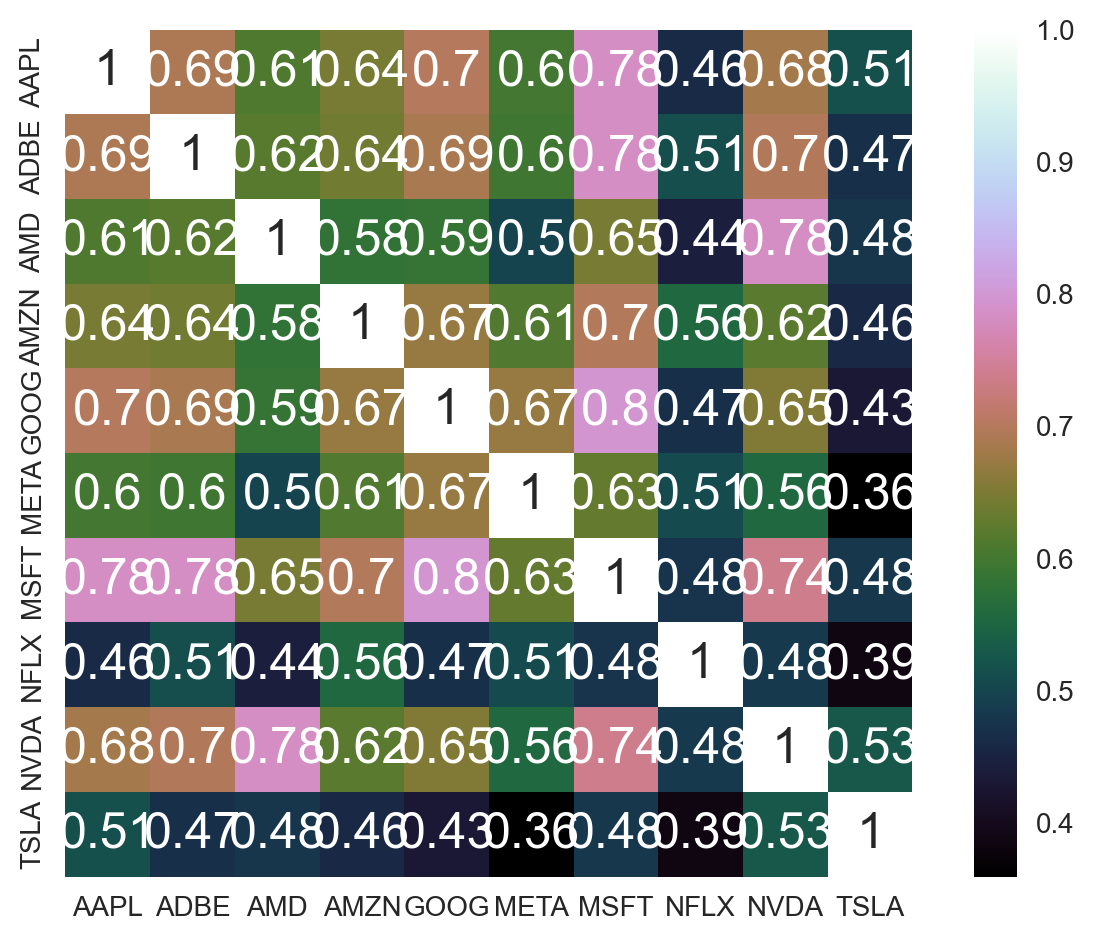

In [285]:
sns.heatmap(log_returns['Adj Close'].corr(), vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

We define the weights

In [234]:
portfolio_weights = n_assets * [1 / n_assets]

In [235]:
portfolio_weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

Calculate Portfolio Returns

In [236]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, log_returns['Adj Close'].T),
    index=log_returns['Adj Close'].index
)

In [237]:
portfolio_returns

Date
2019-06-13    0.004173
2019-06-14   -0.005982
2019-06-17    0.011178
2019-06-18    0.017181
2019-06-19    0.007775
                ...   
2023-06-22    0.011122
2023-06-23   -0.005306
2023-06-26   -0.026479
2023-06-27    0.019383
2023-06-28    0.003972
Length: 1018, dtype: float64

We generate basic performance evaluation plots

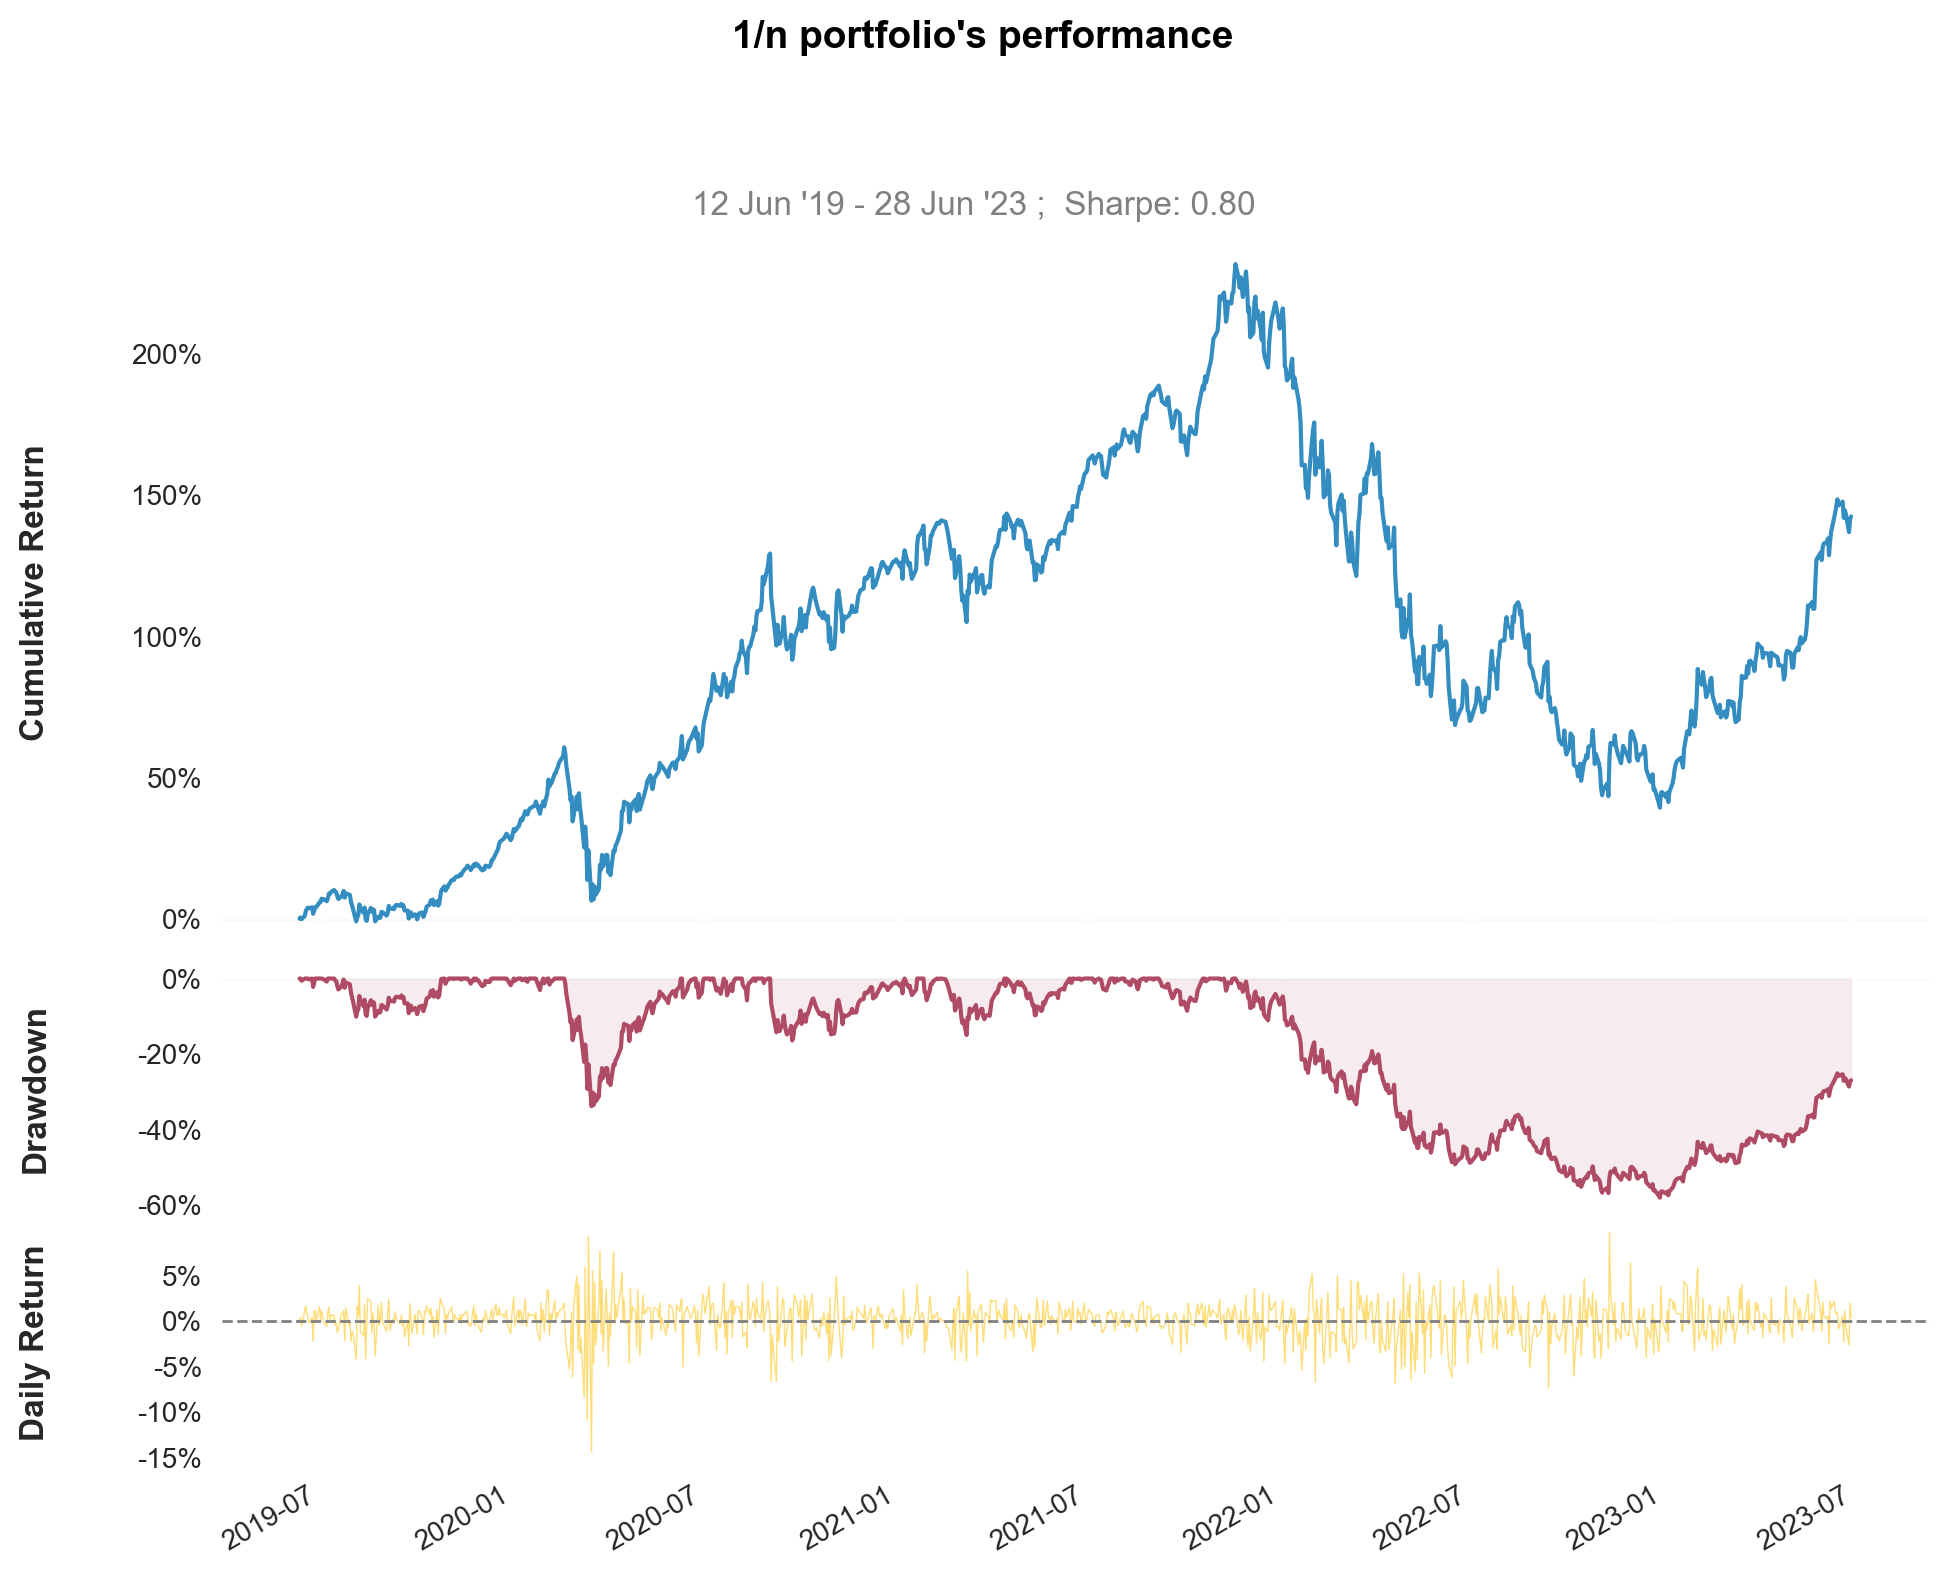

In [238]:
qs.plots.snapshot(portfolio_returns,
                  title="1/n portfolio's performance",
                  grayscale=False)

We calculate basic portfolio evaluation metrics

In [239]:
qs.reports.metrics(portfolio_returns, mode="basic")

                    Strategy
------------------  ----------
Start Period        2019-06-13
End Period          2023-06-28
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   142.47%
CAGR﹪              24.49%

Sharpe              0.8
Prob. Sharpe Ratio  94.44%
Sortino             1.11
Sortino/√2          0.79
Omega               1.15

Max Drawdown        -58.02%
Longest DD Days     583

Gain/Pain Ratio     0.15
Gain/Pain (1M)      0.85

Payoff Ratio        0.87
Profit Factor       1.15
Common Sense Ratio  1.08
CPC Index           0.57
Tail Ratio          0.94
Outlier Win Ratio   3.51
Outlier Loss Ratio  3.56

MTD                 6.81%
3M                  27.92%
6M                  72.05%
YTD                 67.4%
1Y                  33.1%
3Y (ann.)           9.94%
5Y (ann.)           24.49%
10Y (ann.)          24.49%
All-time (ann.)     24.49%

Avg. Drawdown       -4.35%
Avg. Drawdown Days  25
Recovery Factor     2.46
Ulcer Index         0.26
Serenity Index      0.2

Add the methods of quantstats to the Pandas Data Frame

In [240]:
qs.extend_pandas()

We calculate Sharpe ratio and Sortino using the newly added methods

In [241]:
print(f"Sharpe ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Sharpe ratio: 0.80
Sortino ratio: 1.11


In [242]:
print(f"adjusted_sortino: {portfolio_returns.adjusted_sortino():.2f}")
print(f"average_loss: {portfolio_returns.sortino():.2f}")
print(f"calmar: {portfolio_returns.calmar():.2f}")
print(f"conditional_value_at_risk: {portfolio_returns.conditional_value_at_risk():.2f}")
print(f"cvar: {portfolio_returns.cvar():.2f}")
print(f"expected_return: {portfolio_returns.expected_return():.2f}")
print(f"expected_shortfall: {portfolio_returns.expected_shortfall():.2f}")
print(f"max_drawdown: {portfolio_returns.max_drawdown():.2f}")
print(f"risk_return_ratio: {portfolio_returns.risk_return_ratio():.2f}")
print(f"value_at_risk: {portfolio_returns.value_at_risk():.2f}")
print(f"var: {portfolio_returns.var():.2f}")
print(f"volatility: {portfolio_returns.volatility():.2f}")
print(f"worst: {portfolio_returns.worst():.2f}")

adjusted_sortino: 0.79


average_loss: 1.11
calmar: 0.42
conditional_value_at_risk: -0.05
cvar: -0.05
expected_return: 0.00
expected_shortfall: -0.05
max_drawdown: -0.58
risk_return_ratio: 0.05
value_at_risk: -0.04
var: 0.00
volatility: 0.35
worst: -0.14


Finding the Efficient Frontier using MonteCarlo Simulations

In [243]:
# We set up the parameters

N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ['ADBE','AMZN','AAPL','AMD','NFLX','GOOG','META','MSFT','NVDA','TSLA' ]
ASSETS.sort()

n_assets = len(ASSETS)

We calculate the annualized average returns and the corresponding standard deviation

In [244]:
log_returns_df = prices_df["Adj Close"].pct_change().dropna()

avg_returns = log_returns_df.mean() * N_DAYS
cov_mat = log_returns_df.cov() * N_DAYS

In [245]:
fig=px.line(log_returns_df, title='daily_returns')
fig.show()

We simulate random portfolio weights

In [246]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

We calculate the portfolio metrics

In [247]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = portf_rtns / portf_vol

We create the DataFrame containing all the Data

In [248]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

returns  volatility  sharpe_ratio
0      0.410852    0.370545      1.108777
1      0.376839    0.371157      1.015308
2      0.347606    0.346555      1.003032
3      0.376468    0.339567      1.108671
4      0.318679    0.344608      0.924758
...         ...         ...           ...
99995  0.411069    0.350856      1.171615
99996  0.391894    0.368310      1.064034
99997  0.324017    0.332521      0.974427
99998  0.474154    0.389472      1.217430
99999  0.409542    0.353247      1.159363

[100000 rows x 3 columns]

We locate the points creating the Efficient Frontier

In [249]:
N_POINTS = 100

ef_rtn_list = []
ef_vol_list = []

possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(),
    portf_results_df["returns"].max(),
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

We plot the Efficient Frontier

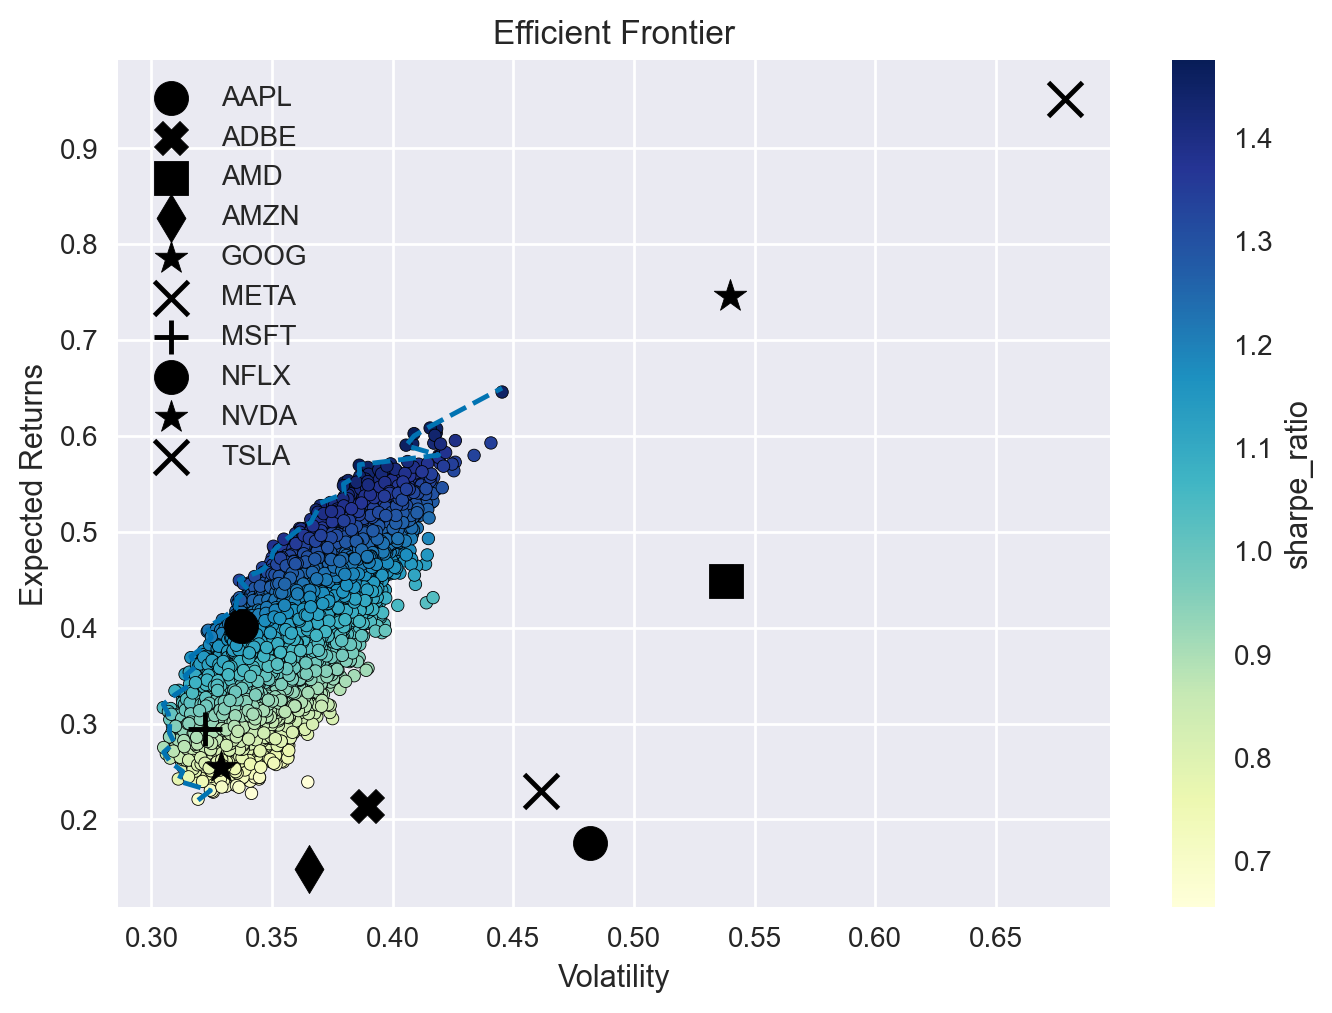

In [250]:
MARKERS = ["o", "X", "s", "d", "*", "x", "+", "o", "*", "x"]
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
                      y="returns", c="sharpe_ratio",
                      cmap="YlGnBu", edgecolors="black",
                      ax=ax)
ax.set(xlabel="Volatility",
       ylabel="Expected Returns",
       title="Efficient Frontier")
ax.plot(ef_vol_list, ef_rtn_list, "b--")
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=MARKERS[asset_index],
               s=150, color="black",
               label=ASSETS[asset_index])
ax.legend()
plt.show()

In [251]:
import numpy as np
max_sharpe_ind = np.argmax(portf_results_df["sharpe_ratio"])
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df["volatility"])
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [252]:
def print_portfolio_summary(perf, weights, assets, name):
    print(f"{name} portfolio")
    print("Performance")
    for index, value in perf.items():
        print(f"{index}: {100 * value:.2f}% ", end="", flush=True)
    print("\nWeights")
    for x, y in zip(assets, weights):
        print(f"{x}: {100*y:.2f}% ", end="", flush=True)

In [253]:
print_portfolio_summary(max_sharpe_portf,
                        weights[max_sharpe_ind],
                        ASSETS,
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio
Performance
returns: 56.95% volatility: 38.61% sharpe_ratio: 147.48% 
Weights
AAPL: 24.02% ADBE: 0.34% AMD: 0.94% AMZN: 4.03% GOOG: 12.69% META: 1.72% MSFT: 2.99% NFLX: 4.71% NVDA: 25.83% TSLA: 22.73% 

In [254]:
print_portfolio_summary(min_vol_portf,
                        weights[min_vol_ind],
                        ASSETS,
                        name="Minimum Volatility")

Minimum Volatility portfolio
Performance
returns: 31.66% volatility: 30.49% sharpe_ratio: 103.83% 
Weights
AAPL: 29.73% ADBE: 3.79% AMD: 0.88% AMZN: 3.45% GOOG: 28.74% META: 4.95% MSFT: 18.00% NFLX: 7.15% NVDA: 0.65% TSLA: 2.66% 

We plot Efficient Frontier with Max Sharpe Ratio and Minimum Volatility

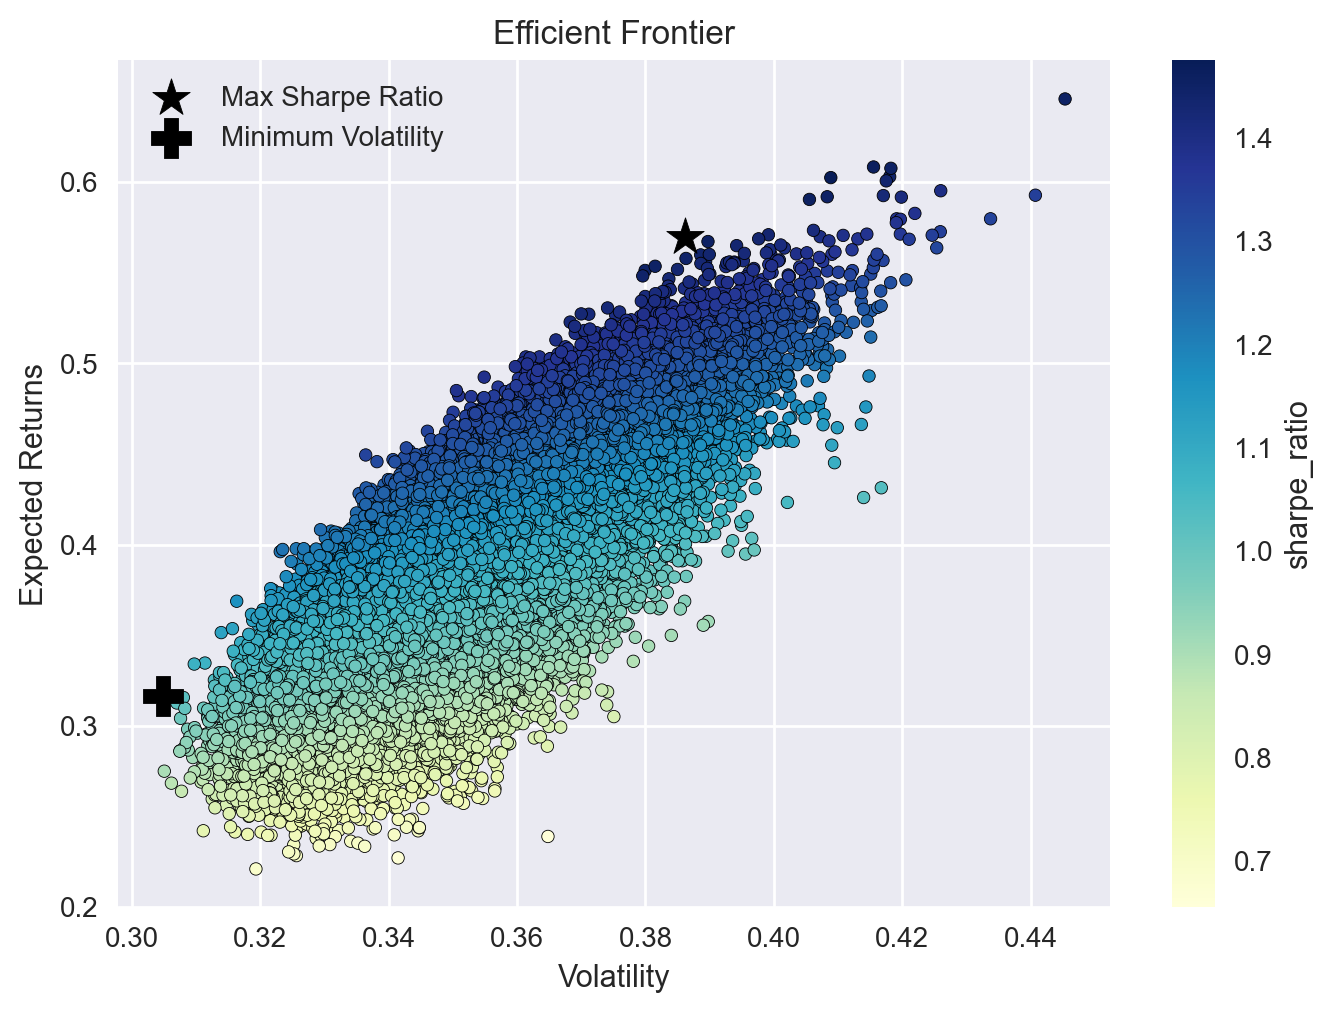

In [255]:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
y="returns", c="sharpe_ratio",
cmap="YlGnBu", edgecolors="black",
ax=ax)
ax.scatter(x=max_sharpe_portf["volatility"],
y=max_sharpe_portf["returns"],
c="black", marker="*",
s=200, label="Max Sharpe Ratio")
ax.scatter(x=min_vol_portf["volatility"],
y=min_vol_portf["returns"],
c="black", marker="P",
s=200, label="Minimum Volatility")
ax.set(xlabel="Volatility", ylabel="Expected Returns",
title="Efficient Frontier")
ax.legend()
plt.show()

Finding the efficient frontier using optimization with scipy.optimize as sco

In [256]:
#We import the scipy library

import scipy.optimize as sco

We define Functions calculating Portfolio Returns and Volatility

In [257]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

We define the Function calculating the Efficient Frontier

In [258]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):

    efficient_portfolios = []

    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]

    for ret in rtns_range:
        constr = (
            {"type": "eq",
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},
            {"type": "eq",
             "fun": lambda x: np.sum(x) - 1}
        )
        ef_portf = sco.minimize(get_portf_vol,
                                initial_guess,
                                args=args, method="SLSQP",
                                constraints=constr,
                                bounds=bounds)
        efficient_portfolios.append(ef_portf)

    return efficient_portfolios

We define the considered range of Expected Portfolio Returns

In [259]:
rtns_range = np.linspace(-0.1, 0.55, 200)

We calculate the Efficient Frontier

In [260]:
efficient_portfolios = get_efficient_frontier(avg_returns, cov_mat, rtns_range)

We extract the volatilities of Efficient Portfolios

In [261]:
vols_range = [x["fun"] for x in efficient_portfolios]

We plot the Efficient Frontier and Simulated Portfolios

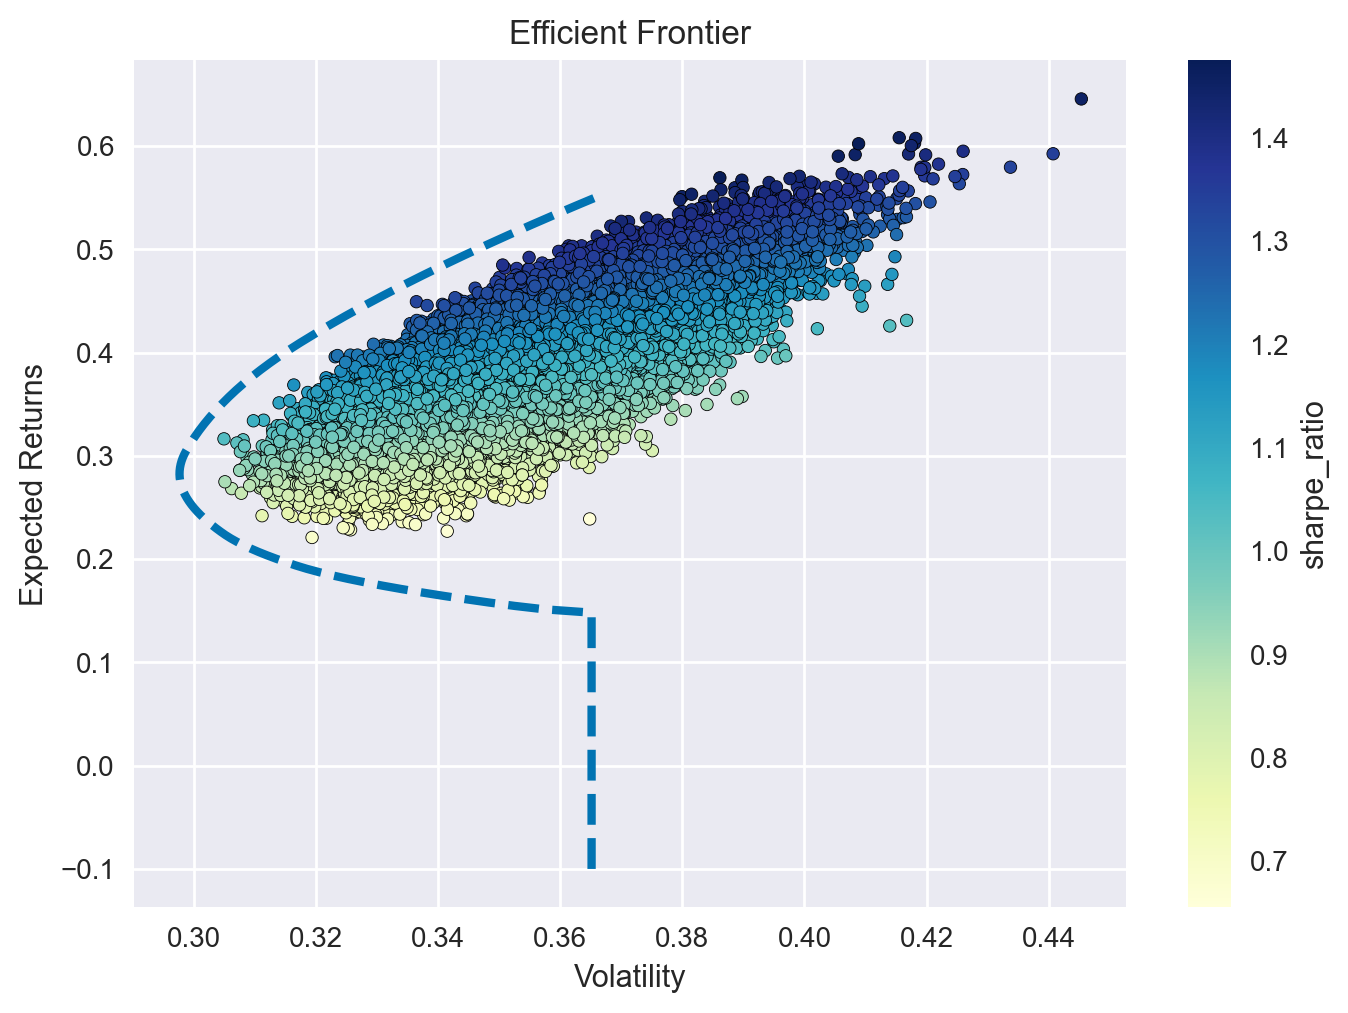

In [262]:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
                          y="returns", c="sharpe_ratio",
                          cmap="YlGnBu", edgecolors="black",
                          ax=ax)
ax.plot(vols_range, rtns_range, "b--", linewidth=3)
ax.set(xlabel="Volatility",
           ylabel="Expected Returns",
           title="Efficient Frontier")

plt.show()

We identify the Portfolio with minimun Volatility

In [263]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]

min_vol_portf = {
    "Return": min_vol_portf_rtn,
    "Volatility": min_vol_portf_vol,
    "Sharpe Ratio": (min_vol_portf_rtn / min_vol_portf_vol)
}

min_vol_portf

{'Return': 0.28216080402010046,
 'Volatility': 0.2976189068446632,
 'Sharpe Ratio': 0.9480607499421037}

We print the Performance Summary

In [264]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (
        (portf_returns - rf_rate) / portf_volatility
    )
    return -portf_sharpe_ratio

We find the Optimized Portfolio

In [265]:
n_assets = len(avg_returns)
RF_RATE = 0

args = (avg_returns, cov_mat, RF_RATE)
constraints = ({"type": "eq",
                "fun": lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio,
                                x0=initial_guess,
                                args=args,
                                method="SLSQP",
                                bounds=bounds,
                                constraints=constraints)

We extract Information about the Maximum Sharpe Portfolio

In [266]:
max_sharpe_portf_w = max_sharpe_portf["x"]
max_sharpe_portf = {
    "Return": get_portf_rtn(max_sharpe_portf_w, avg_returns),
    "Volatility": get_portf_vol(max_sharpe_portf_w,
                                avg_returns,
                                cov_mat),
    "Sharpe Ratio": -max_sharpe_portf["fun"]
}
max_sharpe_portf

{'Return': 0.7584450657363812,
 'Volatility': 0.47253095083512975,
 'Sharpe Ratio': 1.6050696031570837}

We print Perfomance Summary

In [267]:
print_portfolio_summary(max_sharpe_portf, max_sharpe_portf_w, ASSETS, name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio
Performance
Return: 75.84% Volatility: 47.25% Sharpe Ratio: 160.51% 
Weights
AAPL: 19.39% ADBE: 0.00% AMD: 0.00% AMZN: 0.00% GOOG: 0.00% META: 0.00% MSFT: 0.00% NFLX: 0.00% NVDA: 41.96% TSLA: 38.65% 

Finding the Optimal Portfolio with Hierarchical Risk Parity using PyPortfolioOpt (PypfOpt)

In [268]:
#We import the libraries

from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import (
    DiscreteAllocation, get_latest_prices
)
from pypfopt import plotting

Calculate the returns

In [269]:
rtn_df = returns_from_prices(prices_df)["Adj Close"]

Find the Optimal Allocation using Hierarchical Risk Parity (HRPOpt)

In [270]:
hrp = HRPOpt(returns=rtn_df)
hrp.optimize()

OrderedDict([('AAPL', 0.12384894273431184),
             ('ADBE', 0.11624510346422633),
             ('AMD', 0.03078254652106629),
             ('AMZN', 0.1056279315299329),
             ('GOOG', 0.162746744126261),
             ('META', 0.10841301215081534),
             ('MSFT', 0.15277400047252856),
             ('NFLX', 0.11239220712897836),
             ('NVDA', 0.030576897853882425),
             ('TSLA', 0.05659261401799688)])

We display the cleaned weights

In [271]:
weights = hrp.clean_weights()
print(weights)

OrderedDict([('AAPL', 0.12385), ('ADBE', 0.11625), ('AMD', 0.03078), ('AMZN', 0.10563), ('GOOG', 0.16275), ('META', 0.10841), ('MSFT', 0.15277), ('NFLX', 0.11239), ('NVDA', 0.03058), ('TSLA', 0.05659)])


We sum the weights

In [272]:
0.12357 + 0.11608 + 0.03081 + 0.10571 + 0.16295 + 0.10837 + 0.15286 + 0.11227 + 0.03058 + 0.05681

1.00001

We create a simple pie chart to visualize the optimal portfolio weights

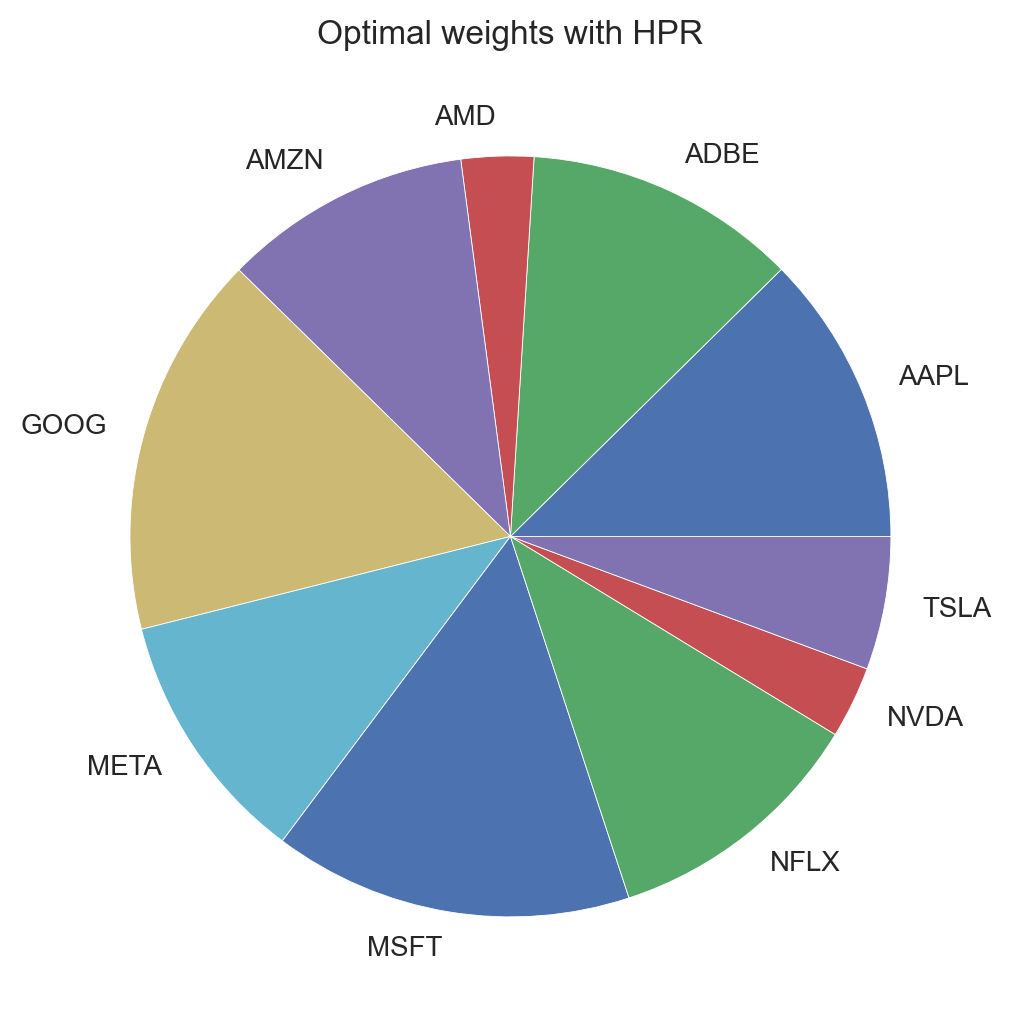

In [273]:
pd.Series(weights).plot(kind="pie",
                        title="Optimal weights with HPR");

sns.despine()
plt.tight_layout()

We calculate the portfolio performance

In [274]:
hrp.portfolio_performance(verbose=True, risk_free_rate=0);

Expected annual return: 31.2%
Annual volatility: 32.1%
Sharpe Ratio: 0.97


We visualize the hierarchical clustering used for finding the portfolio weights

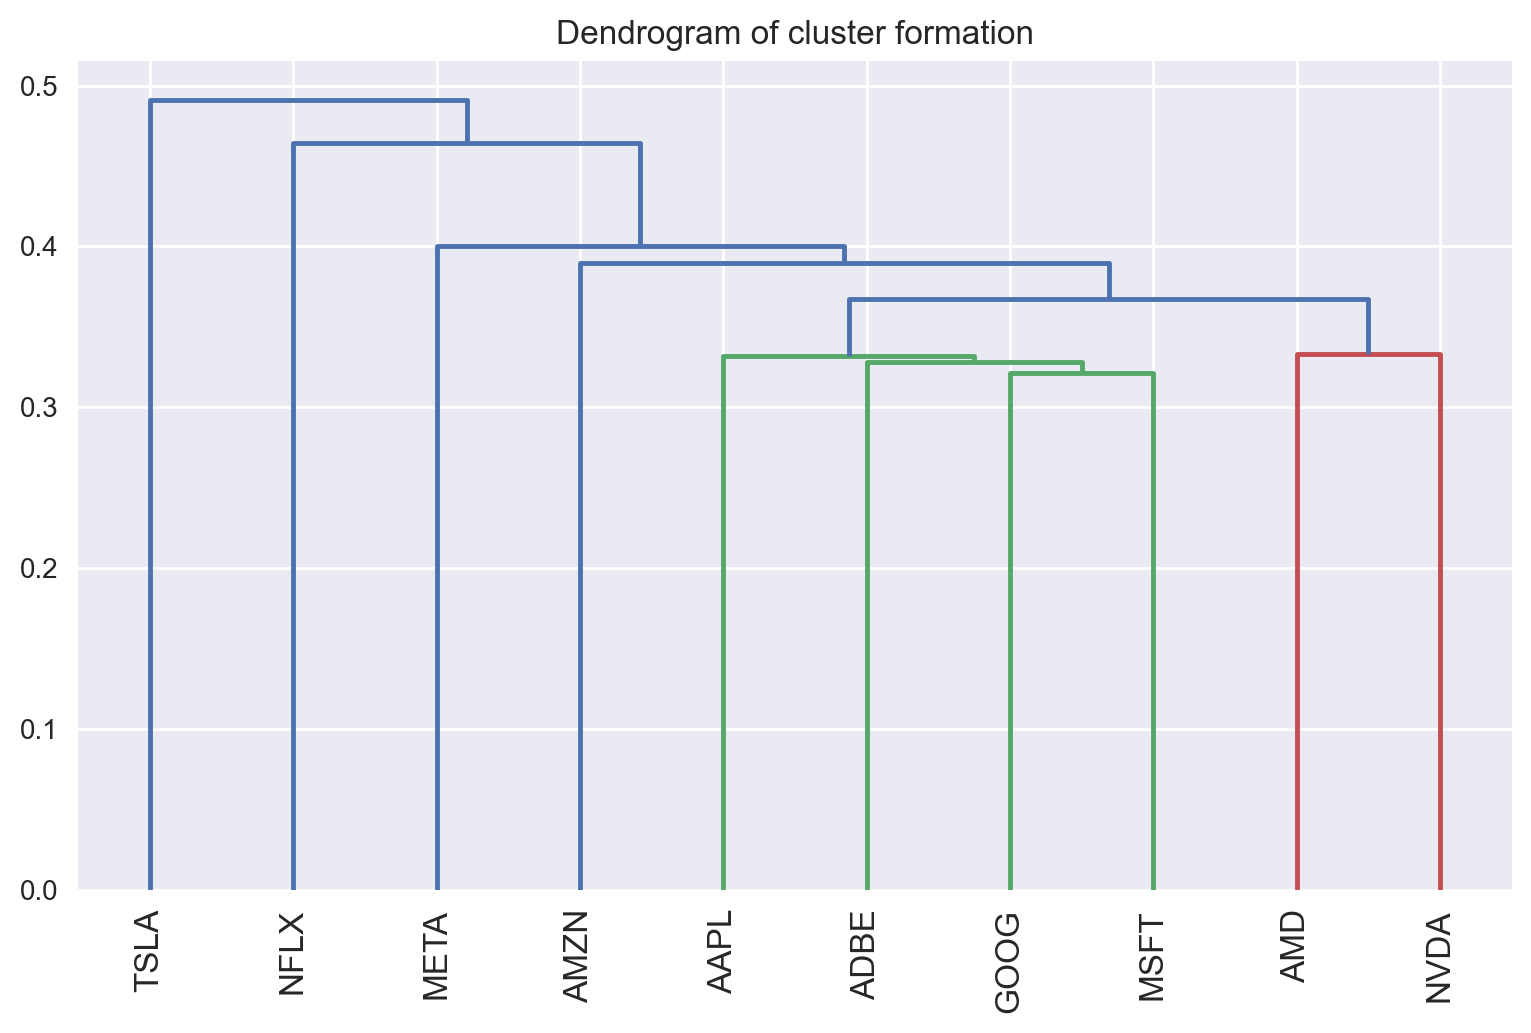

In [275]:
fig, ax = plt.subplots()
plotting.plot_dendrogram(hrp, ax=ax)
ax.set_title("Dendrogram of cluster formation")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_11_18", dpi=200)

In [276]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

cleaned_weights= weights
latest_prices = get_latest_prices(prices_df)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

In [277]:
latest_prices['Adj Close']

AAPL    189.250000
ADBE    482.429993
AMD     110.169998
AMZN    129.039993
GOOG    121.080002
META    285.290009
MSFT    335.850006
NFLX    429.839996
NVDA    411.170013
TSLA    256.239990
Name: 2023-06-28 00:00:00, dtype: float64

In [278]:
weights_df=pd.DataFrame.from_dict(weights, orient ='index')
weights_df.columns=['weights']
weights_df

weights
AAPL  0.12385
ADBE  0.11625
AMD   0.03078
AMZN  0.10563
GOOG  0.16275
META  0.10841
MSFT  0.15277
NFLX  0.11239
NVDA  0.03058
TSLA  0.05659

Text(0.5, 1.0, 'Optimal Weights')

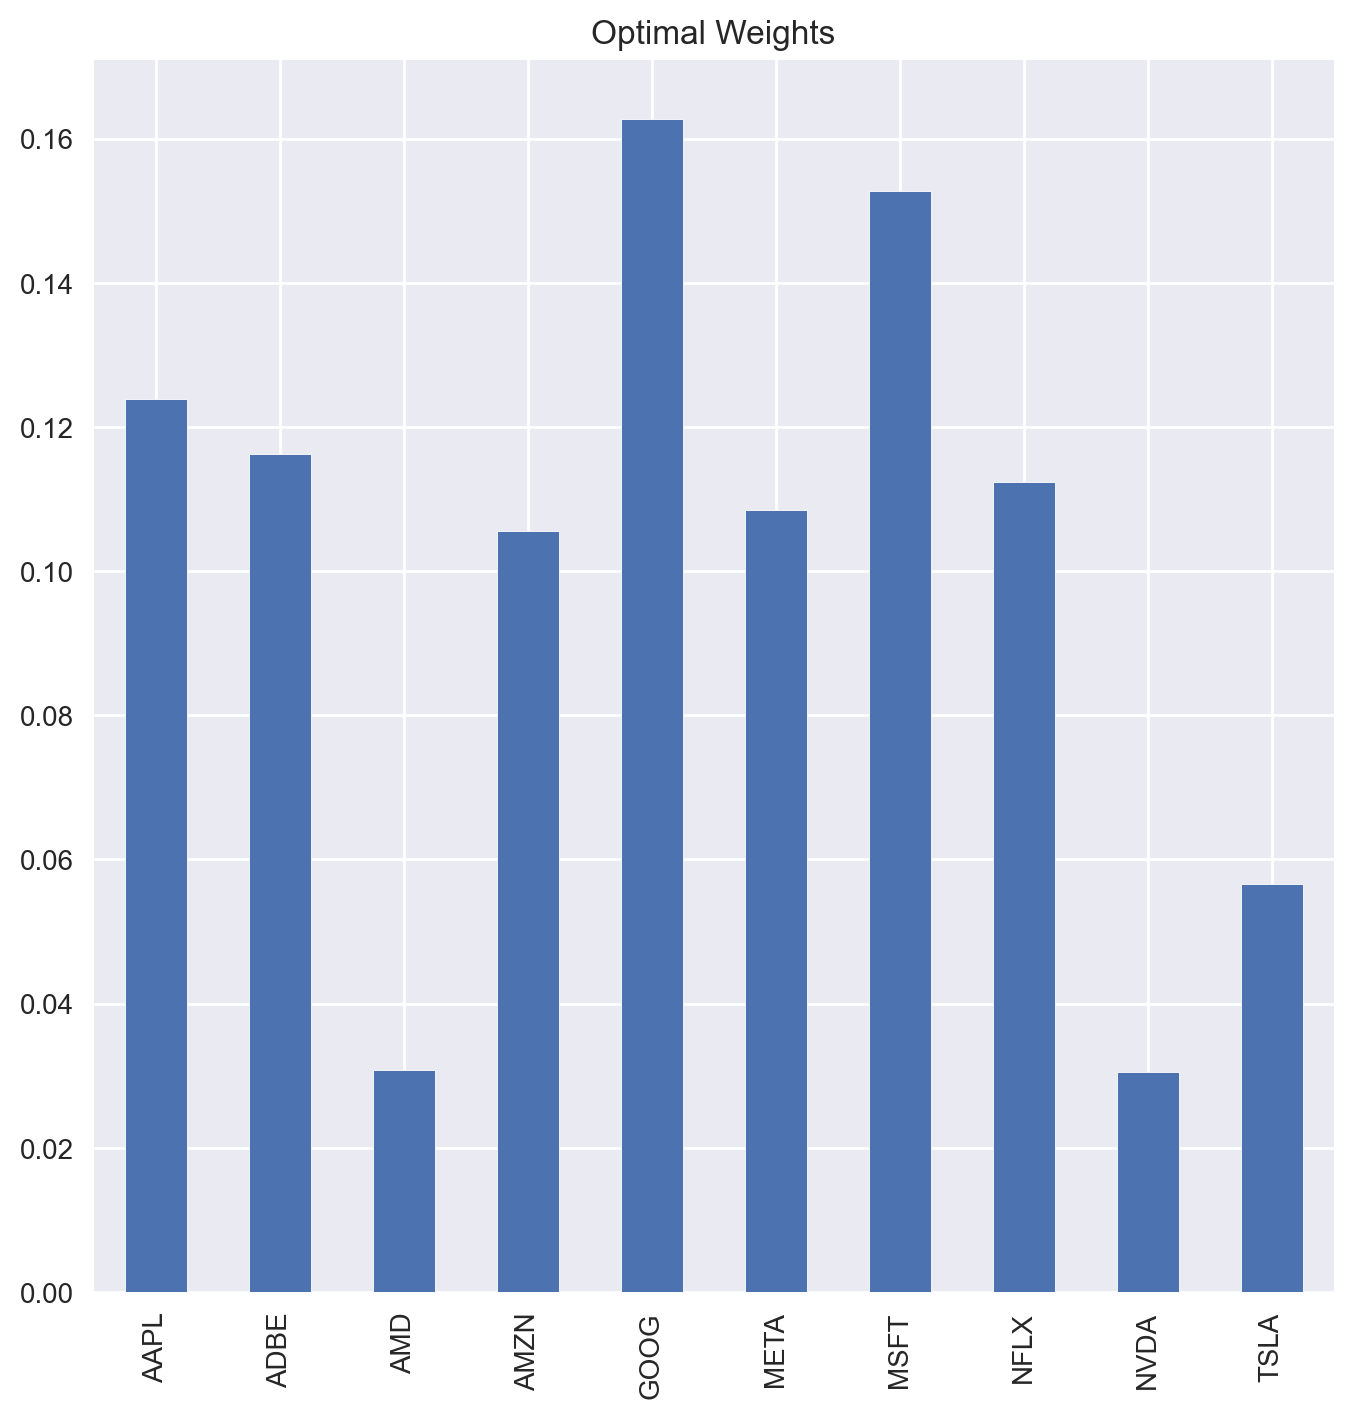

In [279]:
pd.Series(weights).plot.bar(figsize=(8,8))
plt.title('Optimal Weights')

We determine Discrete Allocation and number of shares to buy with 100000

In [280]:
NUM_SHARES_AAPL = (((100000)*0.12357)/184.919998)
NUM_SHARES_ADBE = (((100000)*0.11608)/495.179993)
NUM_SHARES_AMD = (((100000)*0.03081)/120.080002)
NUM_SHARES_AMZN = (((100000)*0.10571)/125.489998)
NUM_SHARES_GOOG = (((100000)*0.16295)/124.059998)
NUM_SHARES_META = (((100000)*0.10837)/281.000000)
NUM_SHARES_MSFT = (((100000)*0.15286)/342.329987)
NUM_SHARES_NFLX = (((100000)*0.11227)/431.959991)
NUM_SHARES_NVDA = (((100000)*0.03058)/426.920013)
NUM_SHARES_TSLA = (((100000)*0.05681)/260.540009)

NUMBER OF SHARES TO BUY FOR EACH STOCK USING 100000 USD

In [281]:
NUM_SHARES_AAPL =  66
NUM_SHARES_ADBE =  23
NUM_SHARES_AMD  =  25
NUM_SHARES_AMZN =  84
NUM_SHARES_GOOG = 131
NUM_SHARES_META =  38
NUM_SHARES_MSFT =  44
NUM_SHARES_NFLX =  25
NUM_SHARES_NVDA =   7
NUM_SHARES_TSLA =  21